In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable


In [3]:
dtype=torch.FloatTensor

In [5]:
char_arr=[c for c in 'abcdefghijklmnopqrstuvwxyz']
word_dict={n:i for i,n in enumerate(char_arr)}
print(word_dict)
number_dict={i:w for i,w in enumerate(char_arr)}
print(number_dict)
n_class=len(word_dict)
print(n_class)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'}
26


In [7]:
seq_data=['make','need','coal','word','love','hate','live','home','hash','star']

n_step=3
n_hidden=128

In [9]:
def make_batch(seq_data):
    input_batch,target_batch=[],[]
    for seq in seq_data:
        input=[word_dict[n] for n in seq[:-1]]
        target=word_dict[seq[-1]]
        input_batch.append(np.eye(n_class)[input])
        target_batch.append(target)
        return Variable(torch.Tensor(input_batch)),Variable(torch.LongTensor(target_batch))

In [31]:
class TextLSTM(nn.Module):
    def __init__(self):
        super(TextLSTM, self).__init__()

        self.lstm = nn.LSTM(input_size=n_class, hidden_size=n_hidden)
        self.W = nn.Parameter(torch.randn([n_hidden, n_class]).type(dtype))
        self.b = nn.Parameter(torch.randn([n_class]).type(dtype))

    def forward(self, X):
        input = X.transpose(0, 1)  # X : [n_step, batch_size, n_class]

        hidden_state = Variable(torch.zeros(1, len(X), n_hidden))   # [num_layers(=1) * num_directions(=1), batch_size, n_hidden]
        cell_state = Variable(torch.zeros(1, len(X), n_hidden))     # [num_layers(=1) * num_directions(=1), batch_size, n_hidden]

        outputs, (_, _) = self.lstm(input, (hidden_state, cell_state))
        outputs = outputs[-1]  # [batch_size, n_hidden]
        model = torch.mm(outputs, self.W) + self.b  # model : [batch_size, n_class]
        return model

input_batch, target_batch = make_batch(seq_data)

model = TextLSTM()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

output = model(input_batch)


        

In [32]:
# Training
for epoch in range(1000):
    optimizer.zero_grad()

    output = model(input_batch)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 100 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

inputs = [sen[:3] for sen in seq_data]

predict = model(input_batch).data.max(1, keepdim=True)[1]
print(inputs, '->', [number_dict[n.item()] for n in predict.squeeze()])

Epoch: 0100 cost = 0.012000
Epoch: 0200 cost = 0.002861
Epoch: 0300 cost = 0.001315
Epoch: 0400 cost = 0.000762
Epoch: 0500 cost = 0.000500
Epoch: 0600 cost = 0.000355
Epoch: 0700 cost = 0.000265
Epoch: 0800 cost = 0.000205
Epoch: 0900 cost = 0.000164
Epoch: 1000 cost = 0.000134
['mak', 'nee', 'coa', 'wor', 'lov', 'hat', 'liv', 'hom', 'has', 'sta'] -> ['e', 'd', 'l', 'd', 'e', 'e', 'e', 'e', 'h', 'r']


In [33]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

dtype = torch.FloatTensor

char_arr = [c for c in 'abcdefghijklmnopqrstuvwxyz']
word_dict = {n: i for i, n in enumerate(char_arr)}
number_dict = {i: w for i, w in enumerate(char_arr)}
n_class = len(word_dict) # number of class(=number of vocab)

seq_data = ['make', 'need', 'coal', 'word', 'love', 'hate', 'live', 'home', 'hash', 'star']

# TextLSTM Parameters
n_step = 3
n_hidden = 128

def make_batch(seq_data):
    input_batch, target_batch = [], []

    for seq in seq_data:
        input = [word_dict[n] for n in seq[:-1]] # 'm', 'a' , 'k' is input
        target = word_dict[seq[-1]] # 'e' is target
        input_batch.append(np.eye(n_class)[input])
        target_batch.append(target)

    return Variable(torch.Tensor(input_batch)), Variable(torch.LongTensor(target_batch))

class TextLSTM(nn.Module):
    def __init__(self):
        super(TextLSTM, self).__init__()

        self.lstm = nn.LSTM(input_size=n_class, hidden_size=n_hidden)
        self.W = nn.Parameter(torch.randn([n_hidden, n_class]).type(dtype))
        self.b = nn.Parameter(torch.randn([n_class]).type(dtype))

    def forward(self, X):
        input = X.transpose(0, 1)  # X : [n_step, batch_size, n_class]

        hidden_state = Variable(torch.zeros(1, len(X), n_hidden))   # [num_layers(=1) * num_directions(=1), batch_size, n_hidden]
        cell_state = Variable(torch.zeros(1, len(X), n_hidden))     # [num_layers(=1) * num_directions(=1), batch_size, n_hidden]

        outputs, (_, _) = self.lstm(input, (hidden_state, cell_state))
        outputs = outputs[-1]  # [batch_size, n_hidden]
        model = torch.mm(outputs, self.W) + self.b  # model : [batch_size, n_class]
        return model

input_batch, target_batch = make_batch(seq_data)

model = TextLSTM()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

output = model(input_batch)

# Training
for epoch in range(1000):
    optimizer.zero_grad()

    output = model(input_batch)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 100 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

inputs = [sen[:3] for sen in seq_data]

predict = model(input_batch).data.max(1, keepdim=True)[1]
print(inputs, '->', [number_dict[n.item()] for n in predict.squeeze()])

Epoch: 0100 cost = 0.011321
Epoch: 0200 cost = 0.002798
Epoch: 0300 cost = 0.001295
Epoch: 0400 cost = 0.000752
Epoch: 0500 cost = 0.000494
Epoch: 0600 cost = 0.000350
Epoch: 0700 cost = 0.000261
Epoch: 0800 cost = 0.000202
Epoch: 0900 cost = 0.000161
Epoch: 1000 cost = 0.000131
['mak', 'nee', 'coa', 'wor', 'lov', 'hat', 'liv', 'hom', 'has', 'sta'] -> ['e', 'd', 'l', 'd', 'e', 'e', 'e', 'e', 'h', 'r']


# GRU

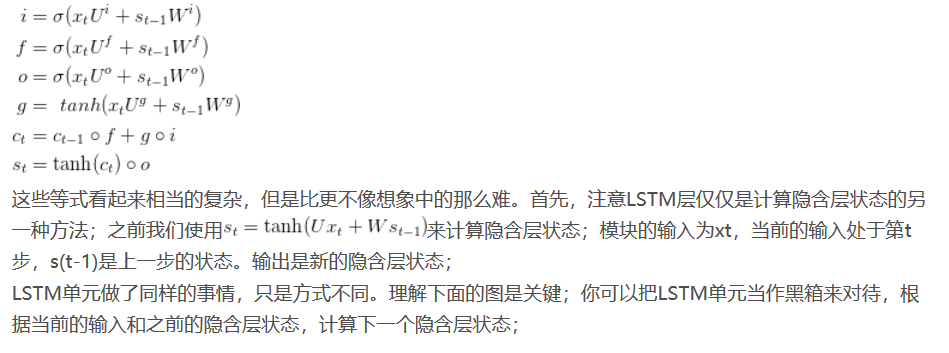

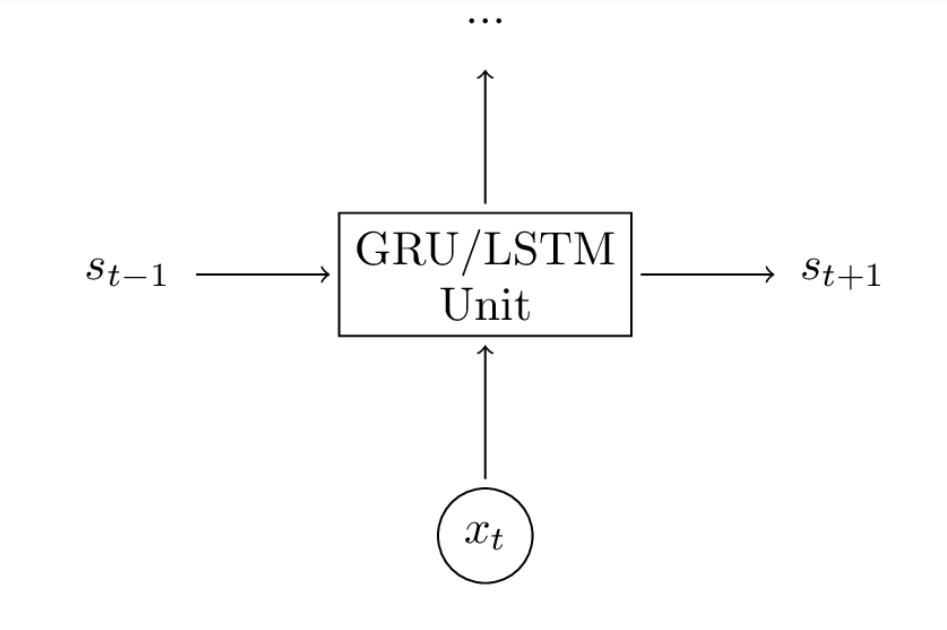

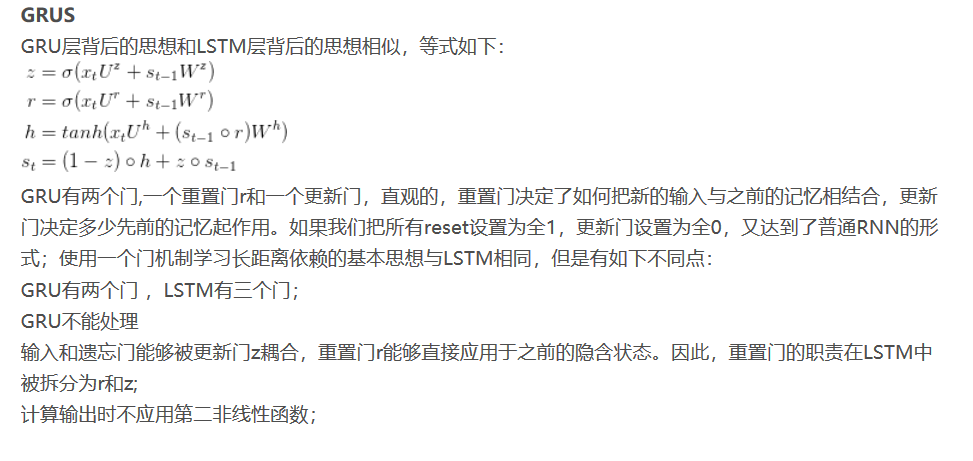

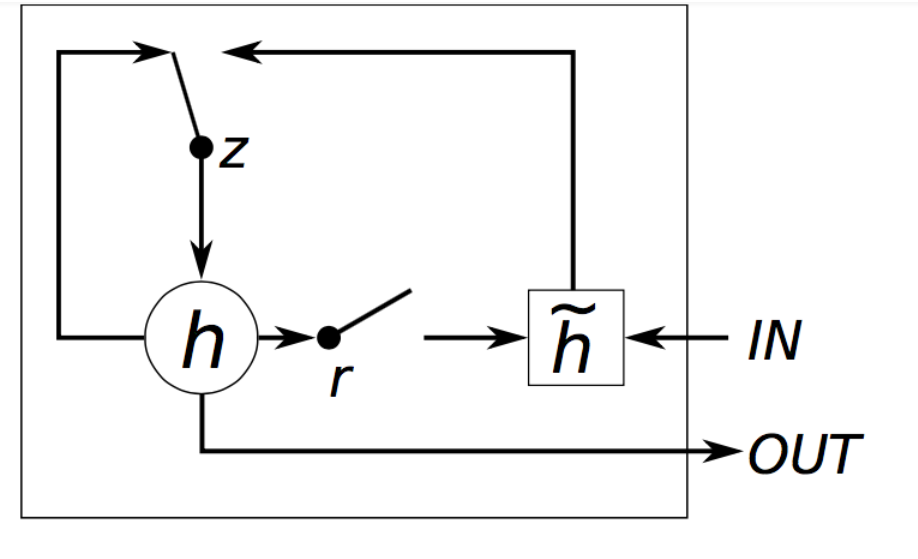

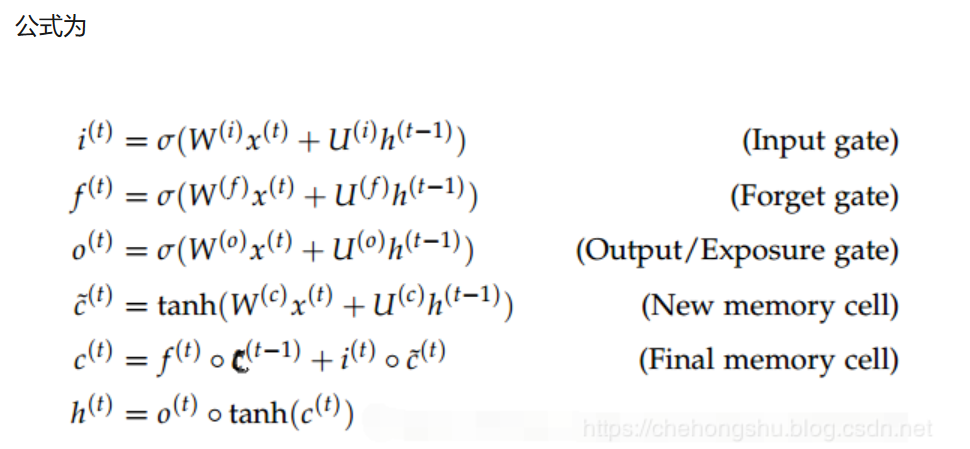

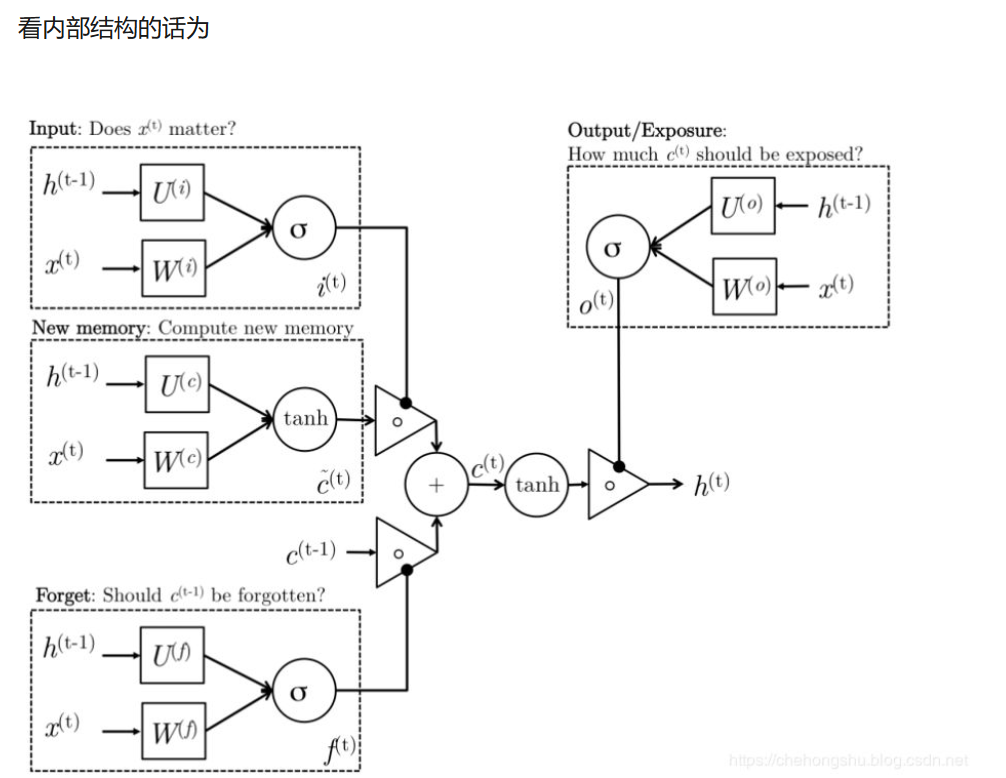

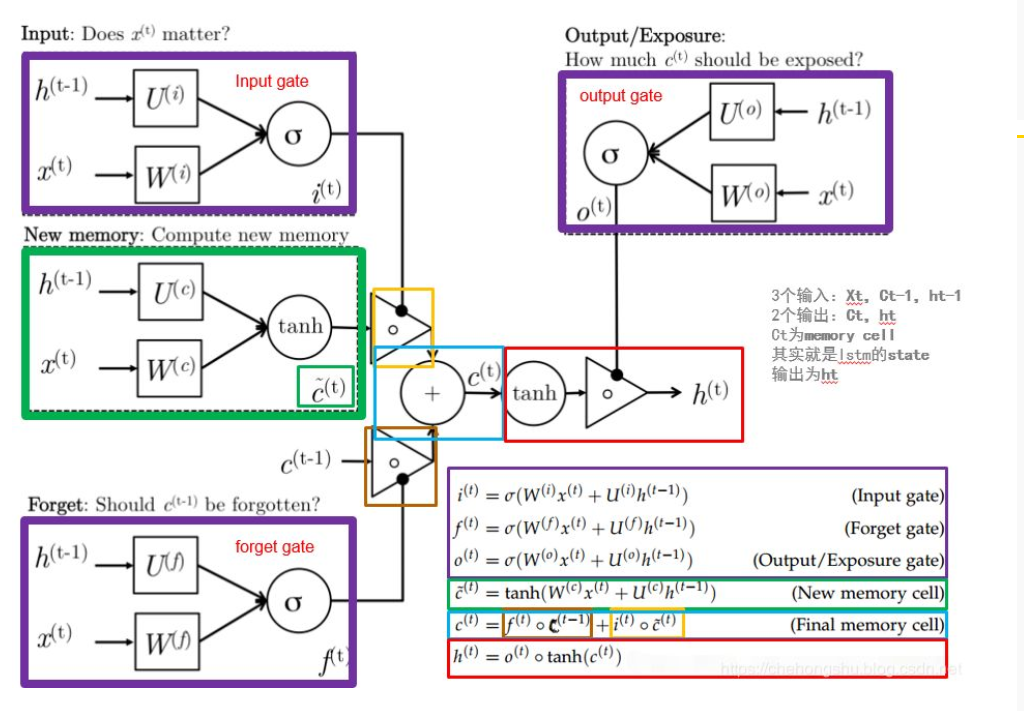

# GRU

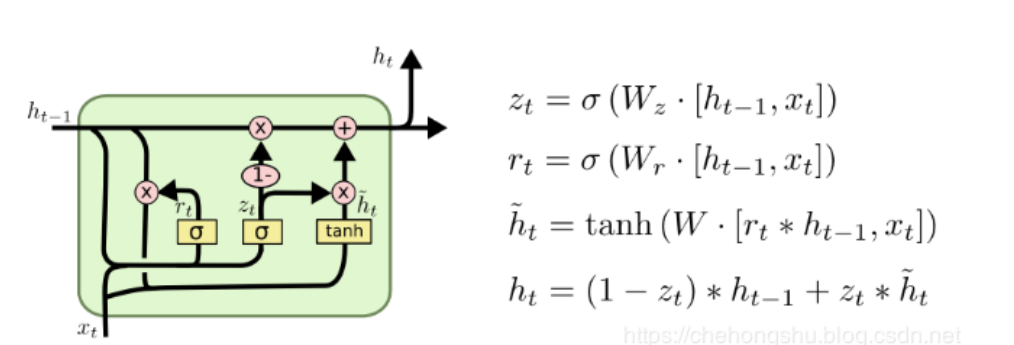

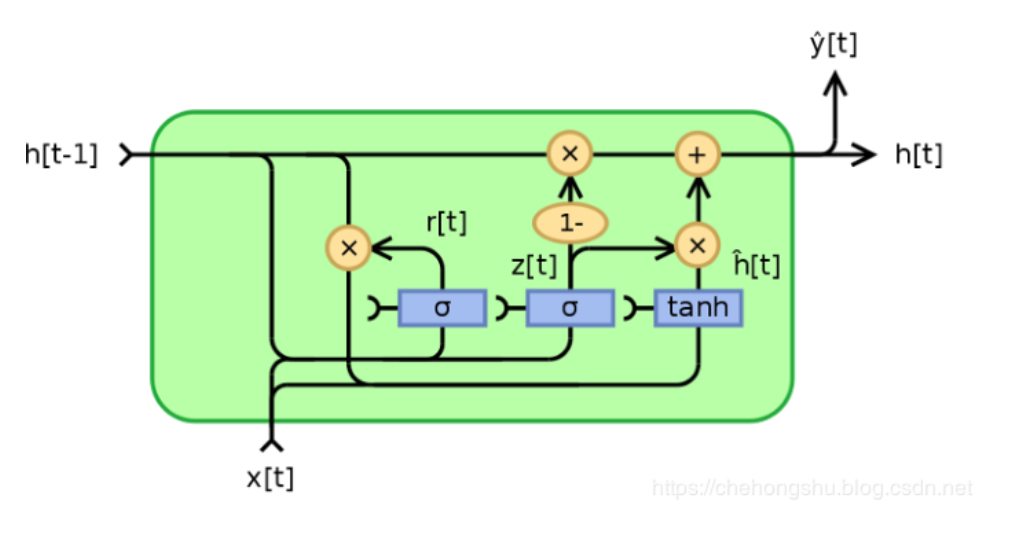

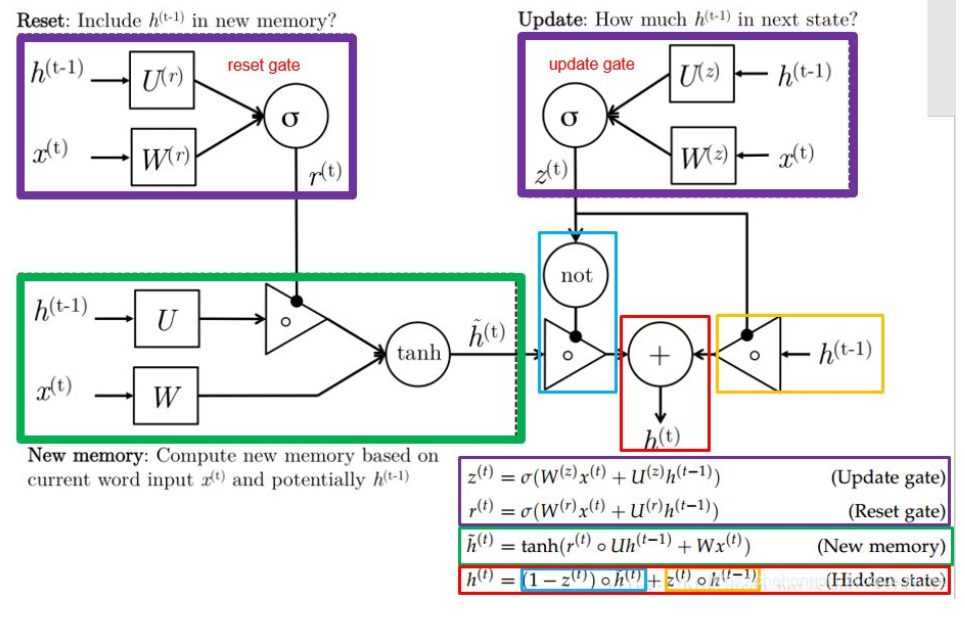

#coding:utf-8
from utils import NormalInit, OrthogonalInit, add_to_params
import theano
import numpy as np
import theano.tensor as T

class SentenceEncoder():
    def init_params(self, word_embedding_param):
        # Initialzie W_emb to given word embeddings
        assert(word_embedding_param != None)
        self.W_emb = word_embedding_param

        """ sent weights """
        self.W_in = add_to_params(self.params, theano.shared(value=NormalInit(self.rng, self.rankdim, self.qdim_encoder), name='W_in'+self.name))
        self.W_hh = add_to_params(self.params, theano.shared(value=OrthogonalInit(self.rng, self.qdim_encoder, self.qdim_encoder), name='W_hh'+self.name))
        self.b_hh = add_to_params(self.params, theano.shared(value=np.zeros((self.qdim_encoder,), dtype='float32'), name='b_hh'+self.name))
        
        self.W_in_r = add_to_params(self.params, theano.shared(value=NormalInit(self.rng, self.rankdim, self.qdim_encoder), name='W_in_r'+self.name))
        self.W_in_z = add_to_params(self.params, theano.shared(value=NormalInit(self.rng, self.rankdim, self.qdim_encoder), name='W_in_z'+self.name))
        self.W_hh_r = add_to_params(self.params, theano.shared(value=OrthogonalInit(self.rng, self.qdim_encoder, self.qdim_encoder), name='W_hh_r'+self.name))
        self.W_hh_z = add_to_params(self.params, theano.shared(value=OrthogonalInit(self.rng, self.qdim_encoder, self.qdim_encoder), name='W_hh_z'+self.name))
        self.b_z = add_to_params(self.params, theano.shared(value=np.zeros((self.qdim_encoder,), dtype='float32'), name='b_z'+self.name))
        self.b_r = add_to_params(self.params, theano.shared(value=np.zeros((self.qdim_encoder,), dtype='float32'), name='b_r'+self.name))

    # This function takes as input word indices and extracts their corresponding word embeddings
    
    def approx_embedder(self, x):
        return self.W_emb[x]

    def GRU_sent_step(self, x_t, m_t, ph_t):
        hr_tm1 = ph_t

        r_t = T.nnet.sigmoid(T.dot(x_t, self.W_in_r) + T.dot(hr_tm1, self.W_hh_r) + self.b_r)
        z_t = T.nnet.sigmoid(T.dot(x_t, self.W_in_z) + T.dot(hr_tm1, self.W_hh_z) + self.b_z)
        h_tilde = T.tanh(T.dot(x_t, self.W_in) + T.dot(r_t * hr_tm1, self.W_hh) + self.b_hh)
        h_t = z_t * hr_tm1 + (np.float32(1.0) - z_t) * h_tilde
        
        m_t = m_t.dimshuffle(0, 'x') #make a column out of a 1d vector (N to Nx1)
        h_t = (m_t) * h_t + (1 - m_t) * ph_t
        
        # return both reset state and non-reset state
        return h_t, r_t, z_t, h_tilde

    def build_encoder(self, x, mask, prev_state): #x是一个matrix
        xe = self.approx_embedder(x)
        
        hs_0 = prev_state
        _res, _ = theano.scan(self.GRU_sent_step,
                          sequences=[xe, mask],\
                          outputs_info=[hs_0, None, None, None])#每次循环输入GRU_sent_step是一个矩阵，shape为N*w_dim(N为x的列维度)

        # Get the hidden state sequence
        h = _res[0] #返回f_enc函数每次调用的第一个输出值，在RGU中h[i]会作为f_enc第i+1次迭代的输入，得到h[i+1]
        return h, mask

    def __init__(self, word_embedding_param, name, config):
        self.name = name
        self.rankdim = config.w_dim
        self.qdim_encoder = config.h_dim
        self.params = []
        self.rng = np.random.RandomState(23333)
        self.init_params(word_embedding_param)

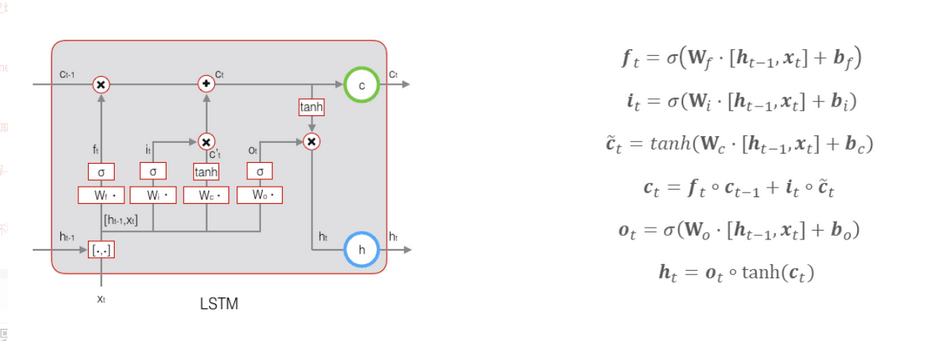

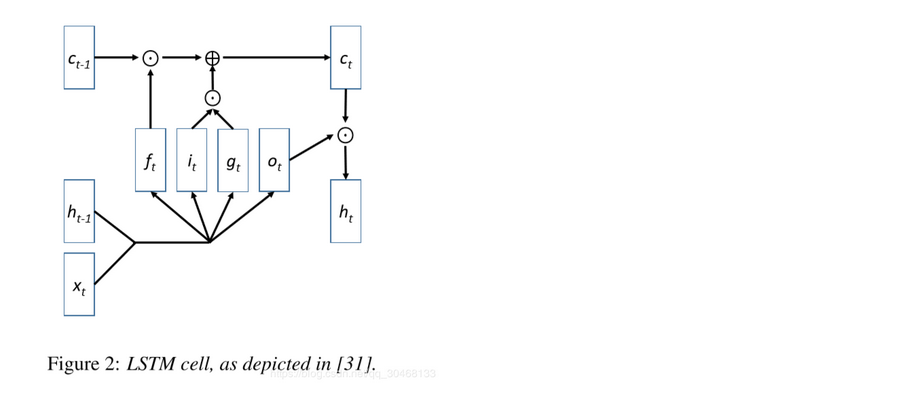

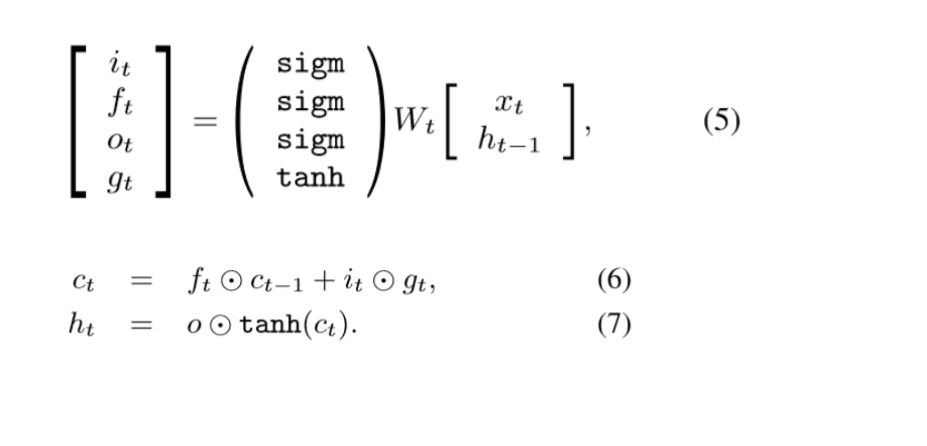

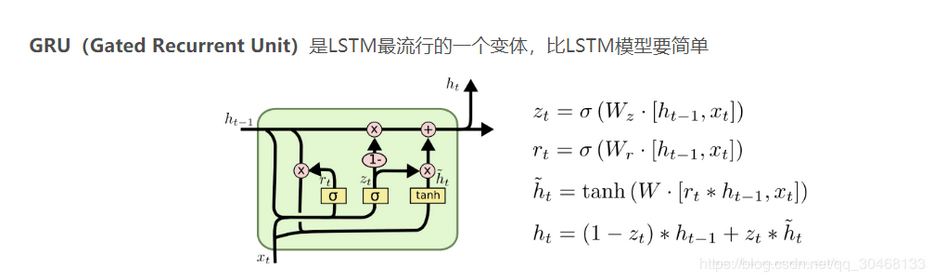

In [35]:
#RNN
rnn=nn.RNN(10,20,2) #(each_input_size, hidden_state, num_layers)
input=torch.randn(5,3,10) # (seq_len, batch, input_size)
h0=torch.randn(2,3,20) #(num_layers * num_directions, batch, hidden_size)
output,hn=rnn(input,h0)
print(output.size(),hn.size())
 
 
#LSTM
rnn=nn.LSTM(10,20,2) #(each_input_size, hidden_state, num_layers)
input=torch.randn(5,3,10) # (seq_len, batch, input_size)
h0=torch.randn(2,3,20) #(num_layers * num_directions, batch, hidden_size)
c0=torch.randn(2,3,20) #(num_layers * num_directions, batch, hidden_size)
output,(hn,cn)=rnn(input,(h0,c0))   #seq_len x batch x hidden*bi_directional
print(output.size(),hn.size(),cn.size())
 
 
#GRU
rnn=nn.GRU(10,20,2)
input=torch.randn(5,3,10)
h0=torch.randn(2,3,20)
output,hn=rnn(input,h0)
print(output.size(),hn.size())


torch.Size([5, 3, 20]) torch.Size([2, 3, 20])
torch.Size([5, 3, 20]) torch.Size([2, 3, 20]) torch.Size([2, 3, 20])
torch.Size([5, 3, 20]) torch.Size([2, 3, 20])
